<a href="https://colab.research.google.com/github/Avinash-Reddy-Kovvuri/Flight_Fare_Analysis/blob/main/Delhi_to_kochi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import datetime

<ipython-input-73-e61d86bb4161>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
multiple_car = pd.read_excel("/content/A - Multiple carriers.xlsx")

In [ ]:
Jetairways = pd.read_excel("//content/A - jet Airways.xlsx")

In [ ]:
Jetairways.head()

,Date,Airlines,Unnamed: 2,From,To,Fare
0,2019-01-01,Jet Airways,NaN,Delhi,Cochin,17024
1,2019-01-02,Jet Airways,NaN,Delhi,Cochin,18799
2,2019-01-03,Jet Airways,NaN,Delhi,Cochin,17024
3,2019-01-04,Jet Airways,NaN,Delhi,Cochin,19828
4,2019-01-05,Jet Airways,NaN,Delhi,Cochin,17234


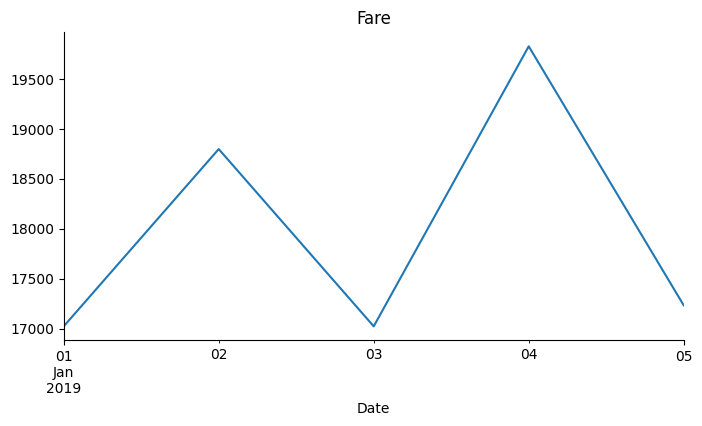

In [ ]:
from matplotlib import pyplot as plt
_df_5['Fare'].plot(kind='line', figsize=(8, 4), title='Fare')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
multiple_car.head()

,Date,Airlines,Unnamed: 2,From,To,Fare
0,2019-01-01,Multiple carriers,NaN,Delhi,Cochin,36983
1,2019-01-02,Multiple carriers,NaN,Delhi,Cochin,23533
2,2019-01-03,Multiple carriers,NaN,Delhi,Cochin,29528
3,2019-01-04,Multiple carriers,NaN,Delhi,Cochin,23170
4,2019-01-05,Multiple carriers,NaN,Delhi,Cochin,15147


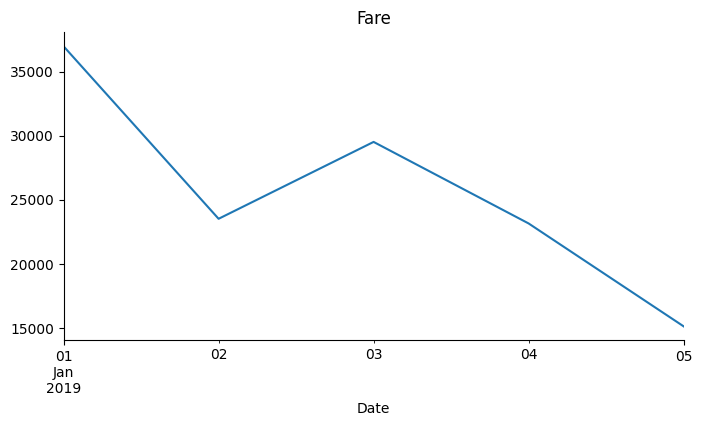

In [ ]:
from matplotlib import pyplot as plt
_df_3['Fare'].plot(kind='line', figsize=(8, 4), title='Fare')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
pip install pmdarima


In [ ]:
from pmdarima import auto_arima

In [ ]:
stepwise_fit = auto_arima(multiple_car['Fare'], start_p = 1, start_q = 1,
                          max_p = 10, max_q = 10, m = 12,
                          start_P = 0, seasonal = True,
                          d = 1, D = 1, trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=8.68 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=21954.490, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=21396.601, Time=0.95 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.23 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=21632.197, Time=0.18 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=21296.951, Time=3.99 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=23.35 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=6.14 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=21518.503, Time=2.94 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=21175.053, Time=3.34 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=21288.910, Time=1.62 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=10.77 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=7.22 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=21118.916, Time=5.74 sec
 ARIMA(3,1,0)(1,1,0)[12]             : 

In [ ]:

train = multiple_car.iloc[:len(multiple_car)-30]
test =multiple_car.iloc[len(multiple_car)-30:]


from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Fare'],
                order = (10,1,0),
                seasonal_order =(2, 1, 0, 12))

result = model.fit()

model1 = result


0      2019-01-01
1      2019-01-02
2      2019-01-03
3      2019-01-04
4      2019-01-05
          ...    
1090   2023-12-27
1091   2023-12-28
1092   2023-12-29
1093   2023-12-30
1094   2023-12-31
Name: Date, Length: 1095, dtype: datetime64[ns]


           Date           Airlines  Unnamed: 2   From      To   Fare
1065 2023-12-02  Multiple carriers         NaN  Delhi  Cochin  13700
1066 2023-12-03  Multiple carriers         NaN  Delhi  Cochin  11000
1067 2023-12-04  Multiple carriers         NaN  Delhi  Cochin   8000
1068 2023-12-05  Multiple carriers         NaN  Delhi  Cochin   8500
1069 2023-12-06  Multiple carriers         NaN  Delhi  Cochin   8800
1070 2023-12-07  Multiple carriers         NaN  Delhi  Cochin  10200
1071 2023-12-08  Multiple carriers         NaN  Delhi  Cochin  12200
1072 2023-12-09  Multiple carriers         NaN  Delhi  Cochin  11000
1073 2023-12-10  Multiple carriers         NaN  Delhi  Cochin  10300
1074 2023-12-11  Multiple carriers         NaN  Delhi  Cochin  10400
1075 2023-12-12  Multiple carriers         NaN  Delhi  Cochin  12500
1076 2023-12-13  Multiple carriers         NaN  Delhi  Cochin  10500
1077 2023-12-14  Multiple carriers         NaN  Delhi  Cochin  12500
1078 2023-12-15  Multiple carriers

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

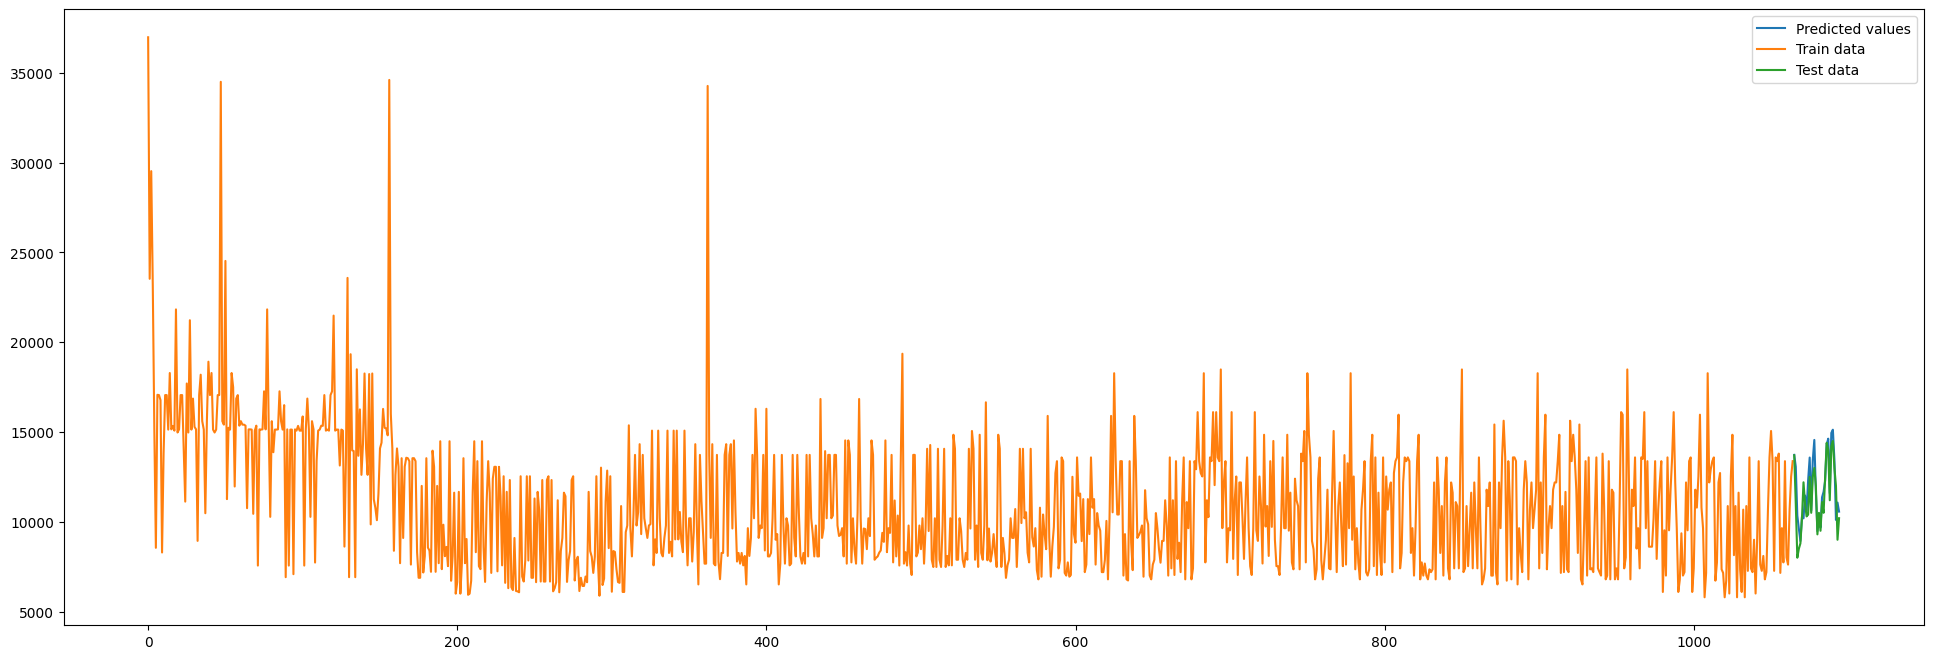

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'linear')



# plot predictions and actual values
predictions.plot(figsize = (24, 8), legend = True, label = "Predicted values")
train['Fare'].plot(legend = True, label = "Train data")
test['Fare'].plot(legend = True, label = "Test data")


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(test['Fare'],predictions)
print(r2)

0.6396384805131423


In [ ]:
stepwise_fit = auto_arima(Jetairways['Fare'], start_p = 1, start_q = 1,
                          max_p = 10, max_q = 10, m = 12,
                          start_P = 0, seasonal = True,
                          d = 1, D = 1, trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=3.50 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=20952.928, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=20431.575, Time=0.48 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.00 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=20697.929, Time=0.15 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=20303.833, Time=8.46 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=13.21 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.68 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=20572.378, Time=1.29 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=20260.142, Time=1.72 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=20331.328, Time=0.75 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=11.48 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=3.90 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=20148.859, Time=7.20 sec
 ARIMA(3,1,0)(1,1,0)[12]             : 

In [ ]:

train = Jetairways.iloc[:len(Jetairways)-30]
test = Jetairways.iloc[len(Jetairways)-30:]


from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Fare'],
                order = (4,1,0),
                seasonal_order =(2, 1, 0, 12))

result = model.fit()

model2 = result


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

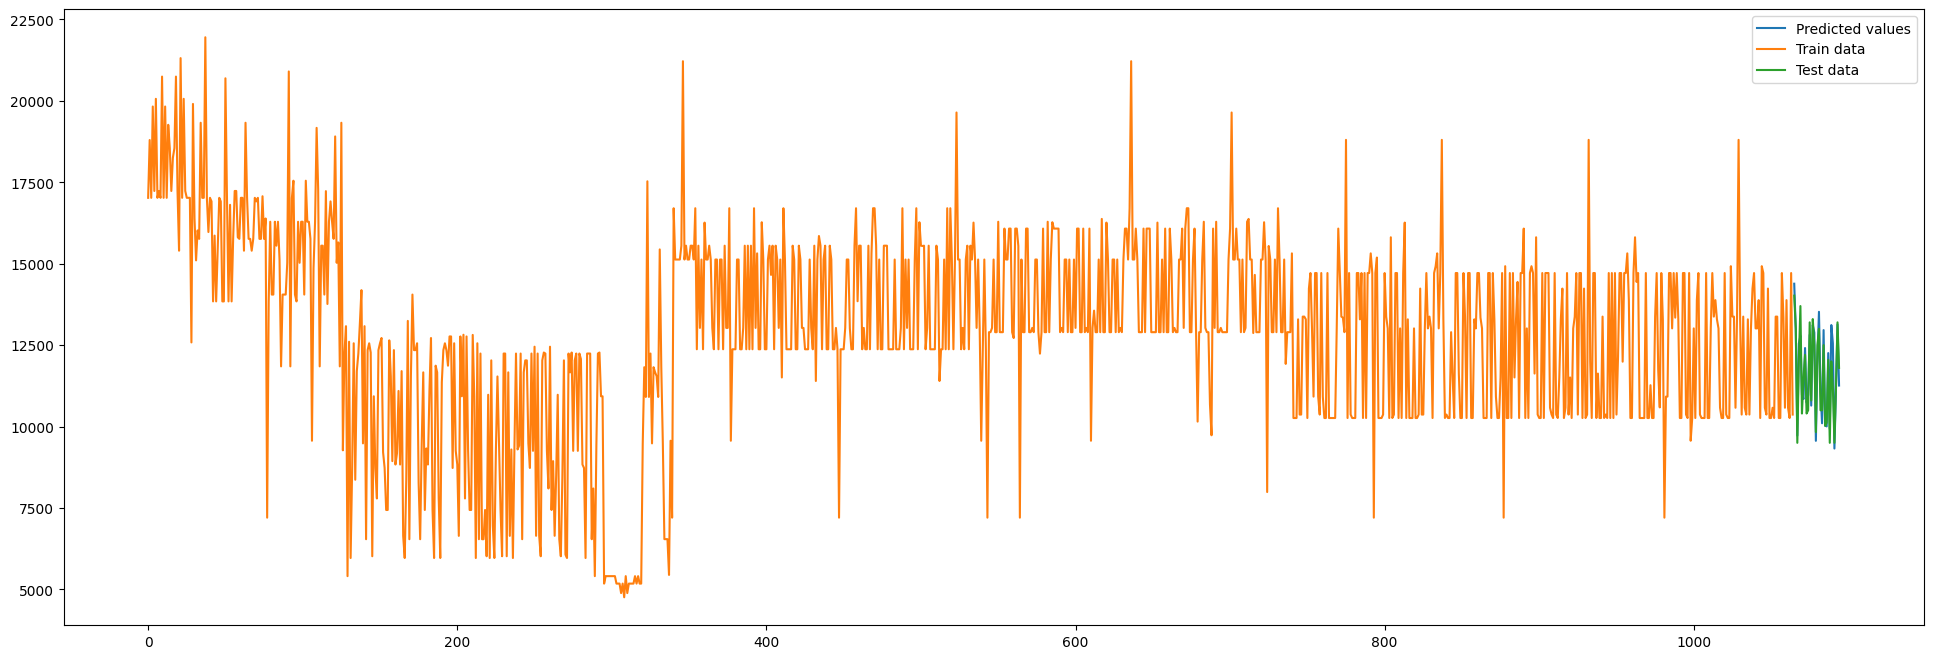

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'linear')


# plot predictions and actual values
predictions.plot(figsize = (24, 8), legend = True, label = "Predicted values")
train['Fare'].plot(legend = True, label = "Train data")
test['Fare'].plot(legend = True, label = "Test data")

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(test['Fare'],predictions)
print(r2)

0.8558778350665504


In [ ]:
from joblib import Parallel, delayed
import joblib


joblib.dump(model1, 'Mul_Del-koc.pkl')
joblib.dump(model2, 'JETAIR_Del-koc.pkl')


['JETAIR_Del-koc.pkl']